# **Выражения-генераторы**

При генерации списков, множеств и словарей отрабатывает определённый внутренний генератор, который последовательно генерировал значения при помощи функции next().

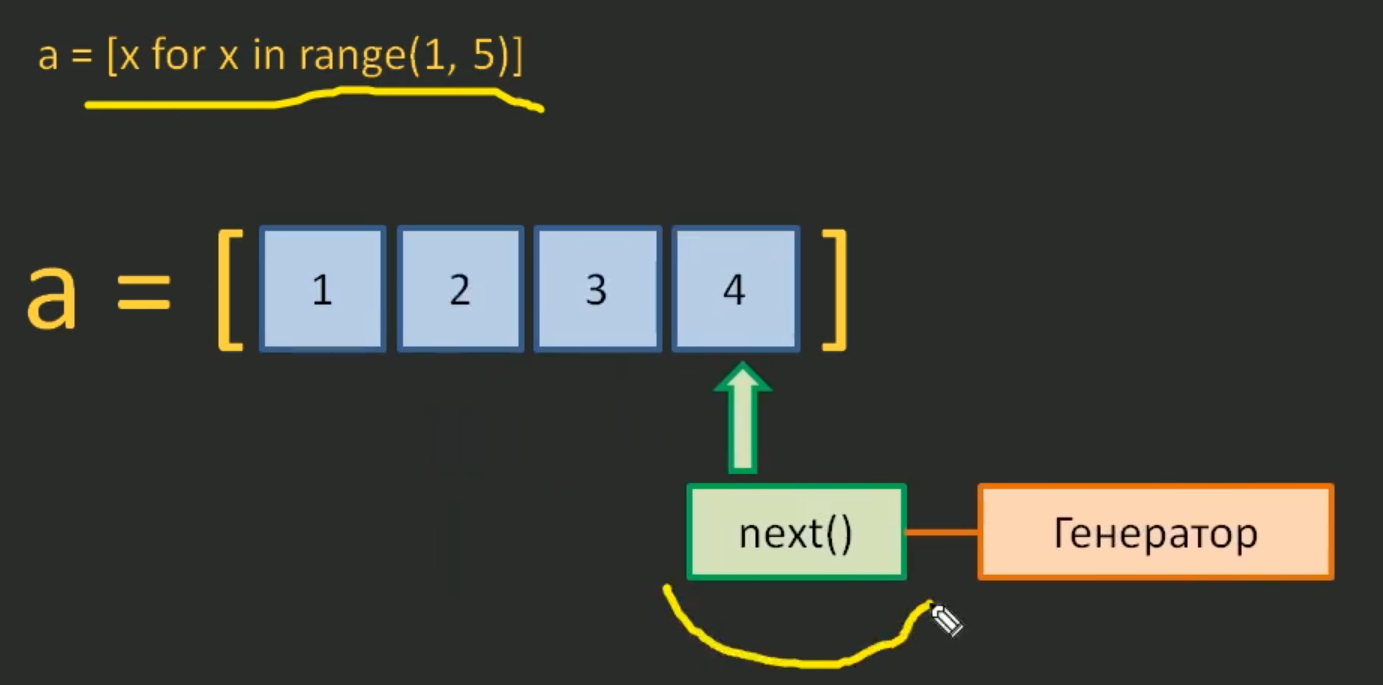

В Python можно определить чистый генератор без привязки к какой-либо коллекции.

Синтаксис (круглые скобки не означают кортеж, генераторов кортежей не существует!):

`(<формирование значения> for <переменная> in <итерируемый объект>)`

Генератор сам по себе является итератором, его можно перебирать функцией next(). Всё происходит так же, как с обычным итератором - когда дойдёт до конца, выдаст ошибку StopIteration. Генератор так же можно перебирать только один раз, если нужно перебрать повторно - надо создавать новый.

Ряд функций (list, set, sum, max, min и д.р.) принимают в качестве аргумента итераторы/генераторы. Функцией len() пользоваться нельзя.

В отличие от условных списков, генераторы не хранят в памяти сразу все значения, а генерируют их по мере необходимости. Список с очень большим количеством значений создать нельзя - не хватит памяти, а генератор - можно.

Генераторы поддаются распаковке через `*`.

In [ ]:
# создаём чистый генератор
gen = (i ** 2 for i in range(6))
print(gen) # <generator object <genexpr> at 0x000001881D3D6B50>
print(next(gen)) # 0
print(next(gen)) # 1
print(next(gen)) # 4
print(next(gen)) # 9
print(next(gen)) # 16
print(next(gen)) # 25

# пример использования функции с генератором
gen = (i ** 2 for i in range(6))
print(sum(gen)) # 55
print(sum(gen)) # 0, так как нельзя использовать/перебирать генератор повторно

# пример распаковки генератора
lst = [(i ** 2 for i in range(6))]
print(lst) # [<generator object <genexpr> at 0x000001881D431560>]
lst = [*(i ** 2 for i in range(6))]
print(lst) # [0, 1, 4, 9, 16, 25]

# **Функция-генератор. Оператор yield**

Функция-генератор отличается от обычной функции тем, что вместо команды `return` в ней используется `yield`. И если `return` завершает работу функции, то инструкция `yield` лишь приостанавливает её, при этом она возвращает какое-то значение.

При первом явном или неявном вызове метода `next()` выполняется код функции с первой команды до `yield`. При втором `next()` и последующих до конца генератора — код со следующей после `yield` команды и до тех пор, пока `yield` не встретится снова.

`yield` — инструмент очень гибкий. Его можно несколько раз использовать в коде функции-генератора. В этом случае команды `yield` служат разделителями кода: при первом вызове метода `next()` выполняется код до первого `yield`, при следующих вызовах — операторы между `yield`. При этом в генераторной функции необязательно должен быть цикл, все значения генератора и так посчитаются.

In [ ]:
# пример функции-генератора
def get_list():
    for i in [1, 2, 3, 4]:
        yield i

a = get_list()
print(a) # <generator object get_list at 0x000001881D434DC0>
# print(next(a)) # 1
# print(next(a)) # 2
# print(next(a)) # 3
# print(next(a)) # 4

for i in a: # next(a) вызывается неявно
    print(i, end=' ') # 1 2 3 4


# расширенный пример функции-генератора (возвращает простые числа до бесконечности)
def simple_digits():
    i = 2 # определяем стартовое значение
    lst = [] # список делителей
    while True:
        for j in lst: # пробегаемся по списку делителей
            if i % j == 0: # если делитель делится на какое-то число из списка делителей, добавляем число в список делителей и переходим к следующему числу
                lst.append(i)                    
                i += 1
                break
        else:
            yield i # генератор
            lst.append(i) # добавляем число в список делителей и переходим к следующему числу
            i += 1      


f = simple_digits()
for i in range(20):
    print(next(f), end = ' ') # 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 